# Ideas

    1) Types of words he used - WordCloud
    2) How often he posted his comments - Count with how many a day he posted with value_count
    3) Show his targets - Count with NUnique



https://www.kaggle.com/masoudmzb/trump-loved-tweeting, I've got some great ideas doing this project. Thank you so much for the great example to share! I learned a lot. https://www.kaggle.com/masoudmzb¶

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
trump = pd.read_csv('trump_insult_tweets_2014_to_2021.csv')
trump

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


In [14]:
# Get rid of 'Unnamed 0' column in the original table
trump.drop(columns = ['Unnamed: 0'], inplace = True)

In [15]:
# See the types 
trump.dtypes

date      object
target    object
insult    object
tweet     object
dtype: object

In [16]:
# change the data column to datetime
trump['date'] = pd.to_datetime(trump['date'])

In [18]:
# See data types now after 'date' column is changed to datetime
trump.dtypes

date      datetime64[ns]
target            object
insult            object
tweet             object
dtype: object

In [19]:
trump.head() #no more 'Unnamed:0' column

,date,target,insult,tweet
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [20]:
# See null data
trump.isnull().sum()
# target column is missing 2 information

date      0
target    2
insult    0
tweet     0
dtype: int64

In [21]:
# fillna '0' to target column
trump['target'].fillna(0, inplace = True)
trump.isnull().sum()

date      0
target    0
insult    0
tweet     0
dtype: int64

In [22]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10360 non-null  datetime64[ns]
 1   target  10360 non-null  object        
 2   insult  10360 non-null  object        
 3   tweet   10360 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 323.9+ KB


## Using Word Cloud, find out what words he liked to use the most

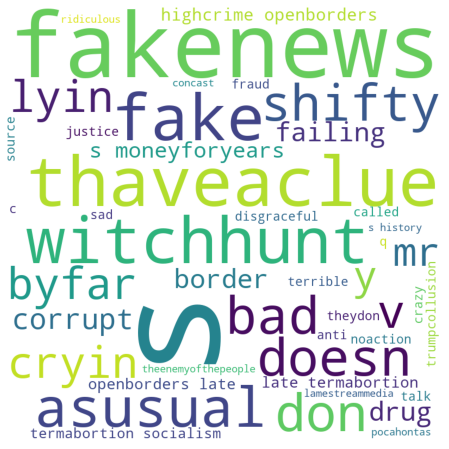

In [30]:
# WordCloud to see what words he used the most....
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in trump['insult']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    words += "".join(tokens)+""
    
wordcloud = WordCloud(width = 800, height = 800,
                     background_color='white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words)

# plot the WoWordCloud image
plt.figure(figsize = (8,8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

In [32]:
# How many different Commnets posted on Twitter
trump['insult'].nunique()
#6729 different varieties of comments he posted

6729

In [34]:
trump['insult'].value_counts()

Fake News                                                    431
Crooked                                                      266
Sleepy Joe                                                   129
failing                                                       82
Crooked Hillary                                               77
                                                            ... 
quotes “a senior White House official,” who doesn’t exist      1
have lost touch!                                               1
Great corruption & dishonesty by Schiff                        1
started the illegal Rigged Witch Hunt                          1
They don’t care about the people, never did!                   1
Name: insult, Length: 6729, dtype: int64

Text(0.5, 1.0, 'Top 5 Instults & Numbers (Out of 6729) ')

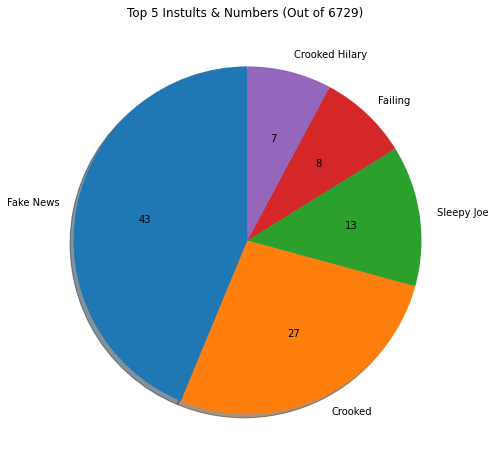

In [41]:
# Let's make PIECHART with the value_counts()
plt.figure(figsize=(8,8))
top_insults = ['Fake News', 'Crooked', 'Sleepy Joe', 'Failing', 'Crooked Hilary']
numbers = [431, 266, 129, 82, 77]
plt.pie(numbers, labels=top_insults, autopct='%d', shadow=True, startangle=90)
plt.title('Top 5 Instults & Numbers (Out of 6729) ')

In [46]:
# Make a dataframe only focussing on insults he made per day
daily_insults = trump.groupby('date')['insult'].count()
daily_insults = pd.DataFrame(daily_insults)
daily_insults.head()

,insult
date,
2014-10-09,2
2015-06-16,1
2015-06-24,3
2015-06-25,11
2015-06-26,3


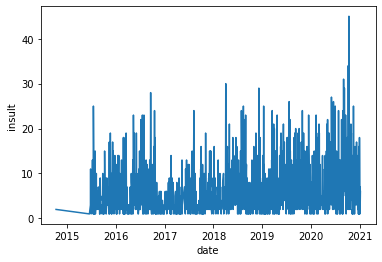

In [49]:
sns.lineplot(data=daily_insults, x='date', y="insult")
# Show the plot
plt.show()
# which is not that useful

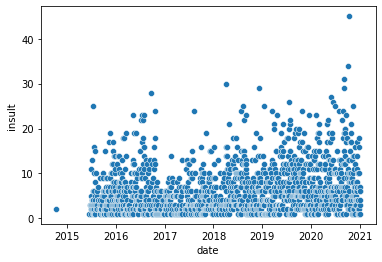

In [50]:
sns.scatterplot(data=daily_insults, x="date", y="insult")
# Show the plot
plt.show()

In [51]:
# Show insults more than 10 times or more
ten_more = daily_insults[daily_insults['insult'] > 10]
ten_more = pd.DataFrame(ten_more)
ten_more

,insult
date,
2015-06-25,11
2015-07-09,13
2015-07-16,25
2015-07-18,16
2015-07-29,15
...,...
2020-12-08,17
2020-12-12,14
2020-12-13,11


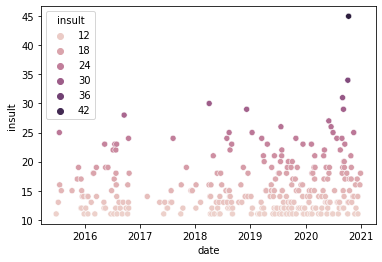

In [53]:
sns.scatterplot(data=ten_more, x="date", y="insult", hue="insult")
# Show the plot
plt.show()

In [54]:
# About 6 times for day, he posted on tweet
mean_tweet = trump.groupby(by=['date']).count().mean()
mean_tweet

target    6.586141
insult    6.586141
tweet     6.586141
dtype: float64

## Find out his target from the table

In [55]:
target = trump.groupby('target')['insult'].count()
target = pd.DataFrame(target) # make a dataframe by target
target

,insult
target,
0,2
2016-election,5
2020-dem-candidates,3
2020-election,143
2020-pres-debate??,1
...,...
world-trade-organization,2
wreath-cancellation-policy,1
wsj-editorial-board,1


In [56]:
most_target = target.sort_values(['insult', 'target'],
                                ascending=False).groupby('target').head()
most_target = pd.DataFrame(most_target)
most_target = most_target.head(5)
most_target

,insult
target,
the-media,1287
democrats,647
hillary-clinton,625
trump-russia,441
joe-biden,402


<AxesSubplot:title={'center':'Trump Target Media'}, xlabel='target'>

<Figure size 10800x10800 with 0 Axes>

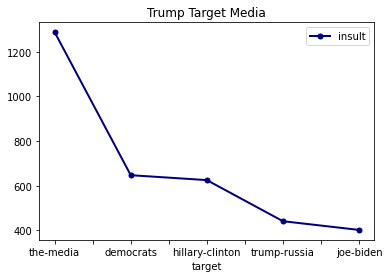

In [59]:
# plot the most 5 targetted items for insults
plt.figure(figsize=(150, 150))
most_target.plot(lw = 2, colormap = 'jet',
                marker='.', markersize=10,
                title='Trump Target Media')